In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [14]:
sns.set_theme(style="darkgrid",context="talk",font_scale=0.6,font="Arial",palette="husl")


In [13]:
pd.set_option('display.float_format','{:,.2f}'.format)

In [12]:
df_co2 = pd.read_csv('../doc/Co2_emissions_by_country.csv')
df_co2.head()
df_co2.dtypes

Country                    object
Region                     object
Date                       object
Kilotons of Co2           float64
Metric Tons Per Capita    float64
dtype: object

In [24]:
df_co2.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

In [25]:
duplicados=df_co2.duplicated().sum()
print(duplicados)

0


Text(0, 0.5, 'Kilotons of Co2')

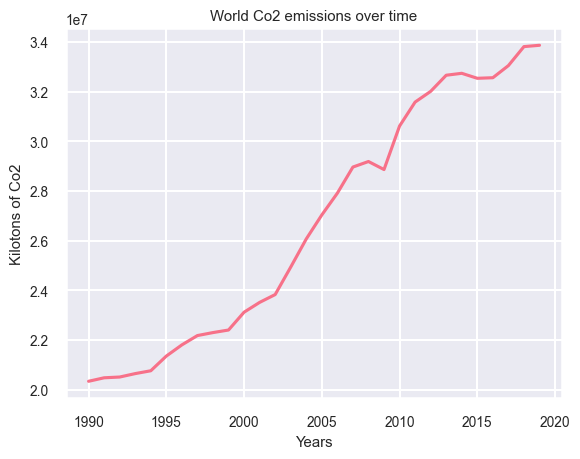

In [33]:
df_co2["Date"]=pd.to_datetime(df_co2["Date"])
world_emissions=df_co2.groupby(df_co2["Date"].dt.year)["Kilotons of Co2"].sum()
world_emissions=world_emissions.reset_index()

world_emissions.rename(columns={"Date": "Year"}, inplace=True)
sns.lineplot(data=world_emissions, x="Year", y="Kilotons of Co2")
plt.title("World Co2 emissions over time")
plt.xlabel("Years")
plt.ylabel("Kilotons of Co2")


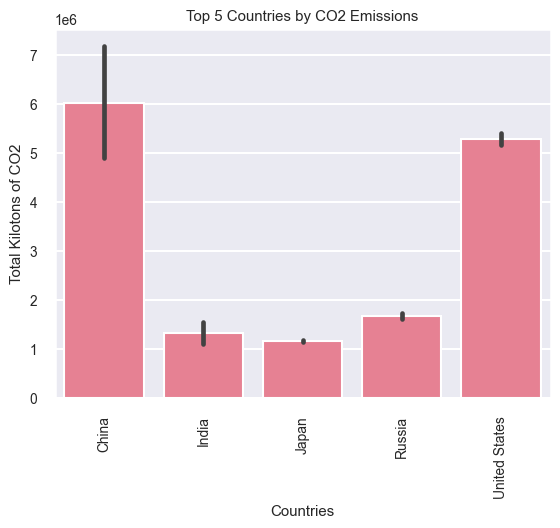

In [45]:

countries_emissions=df_co2.groupby(["Country",df_co2["Date"].dt.year])["Kilotons of Co2"].sum()
countries_emissions=countries_emissions.reset_index()
countries_emissions.rename(columns={"Date": "Year"}, inplace=True) 
top_5_countries=countries_emissions.groupby("Country")["Kilotons of Co2"].sum().sort_values(ascending=False).head(5).index

top_5_countries_emissions = countries_emissions[countries_emissions["Country"].isin(top_5_countries)]

sns.barplot(data=top_5_countries_emissions, x="Country", y="Kilotons of Co2")
plt.title("Top 5 Countries by CO2 Emissions")
plt.xlabel("Countries")
plt.ylabel("Total Kilotons of CO2")
plt.xticks(rotation=90)
plt.show()


           


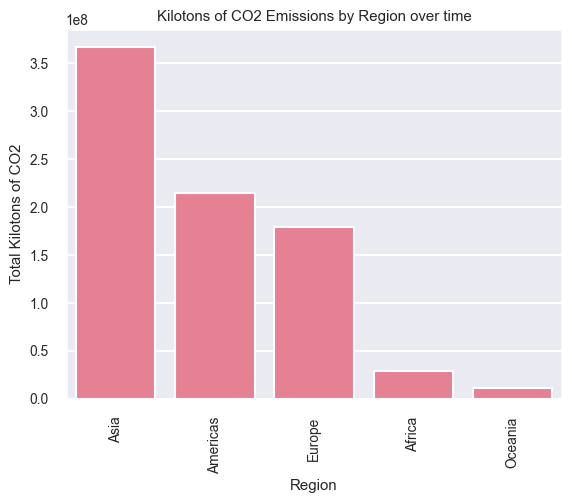

In [40]:
region_emission=df_co2.groupby("Region")["Kilotons of Co2"].sum()
region_emission=region_emission.reset_index()
region_emission.rename(columns={"Kilotons of Co2": "Total Kilotons of Co2"}, inplace=True)
region_emission=region_emission.sort_values("Total Kilotons of Co2",ascending=False)

sns.barplot(data=region_emission, x="Region", y="Total Kilotons of Co2")
plt.title("Kilotons of CO2 Emissions by Region over time")
plt.xlabel("Region")
plt.ylabel("Total Kilotons of CO2")
plt.xticks(rotation=90)
plt.show()
